# Exploration State P01 - Rock-Scissor-Paper Image classifier

In [1]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
!pip install pillow   

from PIL import Image
import os, glob
import tensorflow as tf
from tensorflow import keras
import numpy as np


print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


## C만 해보다가 전혀 다른 파이썬 문법과 처음보는 개념들을 접하며 많이 혼란스러웠다

In [2]:
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/exploration/p01_rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/exploration/p01_rock_scissor_paper/scissor
가위 이미지 resize 완료!


## HOME과 "/aiffel/ ... " 경로가 자꾸 /home/aiffel/aiffel/rock_scissor_paper/scissor 이런 느낌으로
## 나와서 혼란스러웠다    

In [3]:
import os
image_dir_path = os.getenv("HOME") + "/exploration/p01_rock_scissor_paper/rock"
print("img dir path=", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")

# 28 by 28 resize -> save
target_size=(28,28)
for img in images:
  old_img = Image.open(img)
  new_img=old_img.resize(target_size,Image.ANTIALIAS)
  new_img.save(img,"JPEG")
print("바위 이미지 리사이즈 저장 완료!")

img dir path= /home/aiffel/exploration/p01_rock_scissor_paper/rock
바위 이미지 리사이즈 저장 완료!


## 파이썬의 편리함에 다시 한번 놀란 부분

In [4]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]
import os
image_dir_path = os.getenv("HOME") + "/exploration/p01_rock_scissor_paper/paper"
print("img dir path=", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")

# 28 by 28 resize -> save
target_size=(28,28)
for img in images:
  old_img = Image.open(img)
  new_img=old_img.resize(target_size,Image.ANTIALIAS)
  new_img.save(img,"JPEG")
print("리사이즈 이미지 저장 완료1!!!!")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]

img dir path= /home/aiffel/exploration/p01_rock_scissor_paper/paper
리사이즈 이미지 저장 완료1!!!!


In [5]:
def load_data(img_path,number_of_data):
    # 가위 : 0, 바위 : 1, 보 : 2
    # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/exploration/p01_rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path,5778)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화
print("나의 이미지 패스: ",image_dir_path)
print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 5778 입니다.
나의 이미지 패스:  /home/aiffel/exploration/p01_rock_scissor_paper
x_train shape: (5778, 28, 28, 3)
y_train shape: (5778,)


## 새로고침 할 때마다 경로가 리셋되어 학습데이터와 테스트 데이터를 경로를 잘못 설정하는 바람에 한참이나 겹치게 해 버렸다.
## 한시간 정도를 소비하고 나서야 겨우 에러를 고칠 수 있었으나, accuracy는 0.22... 수준으로 처참했다.

라벨:  0


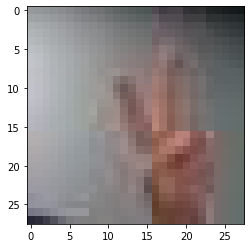

In [6]:
# image load
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 한참을 데이터셋 경로와 중복문제로 괴로워하다가 aiffel뿐만이 아니라 인공지능 경력을 통틀어 처음으로 28*28짜리 조그만 이미지를 띄운 감격의 순간

In [7]:

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

### Dense가 솔직히 좀 많이 사기였다
### 숫자를 무조건 늘린다고 accuracy가 비약적으로 상승하는 게 아니라는 점이 유감이었다

In [8]:
# DL Network train gogo
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]

# reshape
x_train_reshaped=x_train_norm.reshape(-1,28,28,3)

# DL NW train
model.compile(optimizer='adam',
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])
model.fit(x_train_reshaped,y_train,epochs=10)

Epoch 1/10
181/181 [==============================] - 1s 8ms/step - loss: 0.9028 - accuracy: 0.5424
Epoch 2/10
181/181 [==============================] - 1s 8ms/step - loss: 0.4241 - accuracy: 0.8427
Epoch 3/10
181/181 [==============================] - 1s 7ms/step - loss: 0.2225 - accuracy: 0.9242
Epoch 4/10
181/181 [==============================] - 1s 7ms/step - loss: 0.1364 - accuracy: 0.9538
Epoch 5/10
181/181 [==============================] - 1s 7ms/step - loss: 0.0786 - accuracy: 0.9761
Epoch 6/10
181/181 [==============================] - 1s 7ms/step - loss: 0.0521 - accuracy: 0.9841
Epoch 7/10
181/181 [==============================] - 1s 7ms/step - loss: 0.0309 - accuracy: 0.9908
Epoch 8/10
181/181 [==============================] - 1s 7ms/step - loss: 0.0415 - accuracy: 0.9877
Epoch 9/10
181/181 [==============================] - 1s 7ms/step - loss: 0.0436 - accuracy: 0.9858
Epoch 10/10
181/181 [==============================] - 1s 7ms/step - loss: 0.0123 - accuracy: 0.9964

## 감격의 순간 2탄

img dir path= /home/aiffel/exploration/p01_rock_scissor_paper/test/rock
바위 이미지 리사이즈 저장 완료!
img dir path= /home/aiffel/exploration/p01_rock_scissor_paper/test/scissor
scissor 이미지 리사이즈 저장 완료!
img dir path= /home/aiffel/exploration/p01_rock_scissor_paper/test/paper
paper 이미지 리사이즈 저장 완료!
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)
라벨:  0


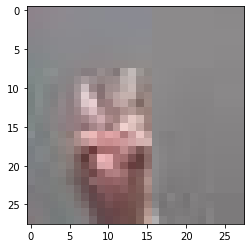

In [9]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# [[YOUR CODE]]
import os

image_dir_path = os.getenv("HOME") + "/exploration/p01_rock_scissor_paper/test/rock"
print("img dir path=", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")

# 28 by 28 resize -> save
target_size=(28,28)
for img in images:
  old_img = Image.open(img)
  new_img=old_img.resize(target_size,Image.ANTIALIAS)
  new_img.save(img,"JPEG")
print("바위 이미지 리사이즈 저장 완료!")


image_dir_path = os.getenv("HOME") + "/exploration/p01_rock_scissor_paper/test/scissor"
print("img dir path=", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")

# 28 by 28 resize -> save
target_size=(28,28)
for img in images:
  old_img = Image.open(img)
  new_img=old_img.resize(target_size,Image.ANTIALIAS)
  new_img.save(img,"JPEG")
print("scissor 이미지 리사이즈 저장 완료!")



image_dir_path = os.getenv("HOME") + "/exploration/p01_rock_scissor_paper/test/paper"
print("img dir path=", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")

# 28 by 28 resize -> save
target_size=(28,28)
for img in images:
  old_img = Image.open(img)
  new_img=old_img.resize(target_size,Image.ANTIALIAS)
  new_img.save(img,"JPEG")
print("paper 이미지 리사이즈 저장 완료!")


# normalize, make test dataset

image_dir_path = os.getenv("HOME") + "/exploration/p01_rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path,300)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

import matplotlib.pyplot as plt
plt.imshow(x_test[0])
print('라벨: ', y_test[0])

x_test_reshaped=x_test_norm.reshape(-1,28,28,3)

## 테스트 이미지 리사이징 및 normalize하는 부분에서 코드가 많이 지저분해진 느낌이다
## 여기서
```python
    x_test_reshaped=x_test_norm.reshape(-1,28,28,3)
```
## 부분에서 x_test에 x_train_norm값을 대입하고 있었다는 사실을 발견했을 땐 격하게 집에 가고 깊었다


In [10]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 0.8604 - accuracy: 0.7133
test_loss: 0.8603586554527283 
test_accuracy: 0.7133333086967468


## 동일한 코드, 동일한 데이터임에도 최종 accuracy가 0.78~0.87 사이를 왔다갔다 한다.
## 그래도 0.98같은 비현실적인 값이 아닌 안정적인 값을 얻을 수 있어 좋았다

# 첫 프로젝트, 낯선 언어 낯선 문법 낯설고 어려운 개념들을 한꺼번에 접하게 되어 정신이 혼미하지만 오늘 트레인 데이터를 학습시키듯 셀프딥러닝을 통해 역량있는 AI인으로 거듭나고 싶다